In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression

In [3]:
#importing data
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

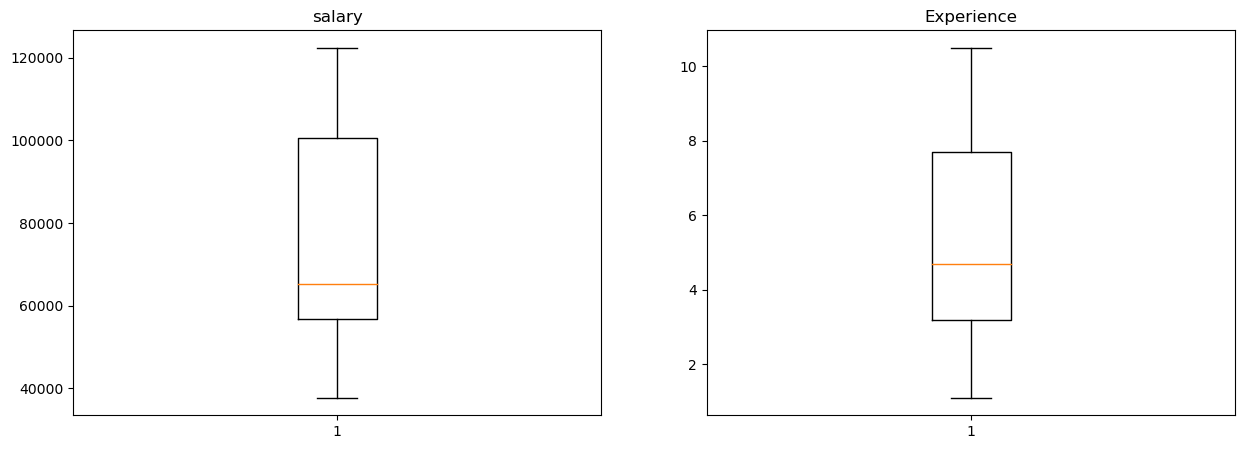

In [7]:
#check outliers
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
plt.boxplot(data['Salary'])
plt.title("salary")
plt.subplot(1,2,2)
plt.boxplot(data['YearsExperience'])
plt.title("Experience")
plt.show()

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

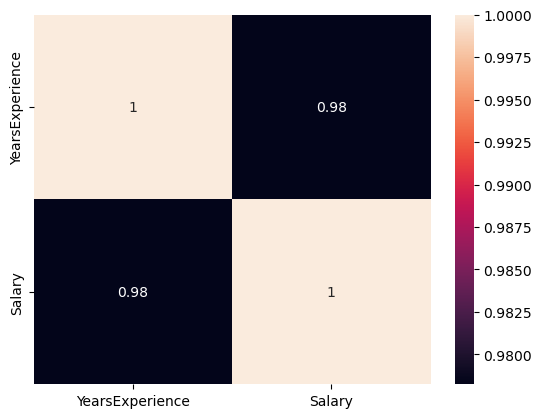

In [9]:
sns.heatmap(data.corr(),annot=True)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

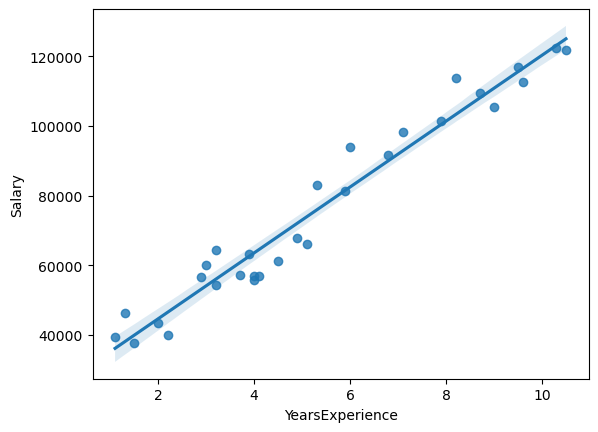

In [13]:
sns.regplot(x=data['YearsExperience'],y=data['Salary'])  

In [10]:
#here you can see correlation between two variables  is good and above 0.8.

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(data[['YearsExperience']],data[['Salary']])


LinearRegression()

In [15]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        18:33:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#rsquared and adjusted rsquared values are above 0.85 that makes him good prediction model.

In [17]:
#square root transformation

model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           7.58e-19
Time:                        18:36:51   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#cube root transformation
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           6.37e-18
Time:                        18:40:21   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#log transformation
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 24 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        18:41:03   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# by seeing all transformations this is the good prediction model.
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [22]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [24]:
newdf=pd.DataFrame()
newdf['YearsExperience']=data['YearsExperience']
newdf['Salary']=data["Salary"]
newdf['Predected_salary']=lm.predict(data[["YearsExperience"]])
newdf.head(10)

,YearsExperience,Salary,Predected_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
